## Final Project Submission

Please fill out:
* Student name: Dhruv Ragunathan
* Student pace: part time
* Scheduled project review date/time: 02/03/2023 10:30-11:15 AM
* Instructor name: Mark Barbour
* Blog post URL: https://medium.com/@dhruvragunathan/the-us-healthcare-systems-data-problem-645f654d4726


In [1]:
# Your code here - remember to use markdown cells for comments as well!

In [2]:
# Final Project Submission

# Analysis on Variables that Impact Movie Return on Investment

## Business Problem

Microsoft is exploring starting a movie studio. The executives at Microsoft leading the project need a strategy to produce successful movies. This analysis is to identify factors linked to successful movies in the industry. Also, to help the execs in defining an approach producing movies and what key variables matter. 

This analysis focuses on determining the types of films are doing the best at the box office. Also, translating these insights into actionable steps for Microsoft executives. Microsoft executives 

### Objectives

* Analyze data on movies from various data sources that track movie performance such as The Numbers, Box Office Mojo, IMDB, Rotten Tomatoes.
* Identify a measurement to track the success of a movie. Return on investment will be used in this analysis.
* Explore Correlations between Return-on-Investment (ROI) and variables such as movie length, ratings, genres, actors, and directors.
* Provide Microsoft concrete recommendations on what they should do when entering the movie industry.



In [3]:
# Import pandas library, numpy, and matplotlib

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Data Cleaning - The Numbers Data

The Numbers is a film industry data website that tracks box office revenue. The data from this set contains a list of movies, their production budget, domestic gross, and world gross. This data will help us calculate the ROI for the movies in the list, which is our indicator for movie success.

The data set does not contain variables we want to measure such as genre, actors, directors, ratings, and runtime. The data set needs to be merged with others to perform such analysis.


### Objectives
* Import Data from The Numbers CSV
* Cleaning Data from the set for analysis
* Store the output in a Data Frame

In [5]:
# Pull in the data from The Numbers

tn_budgets_df = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

tn_budgets_df.describe


<bound method NDFrame.describe of       id  release_date                                        movie  \
0      1  Dec 18, 2009                                       Avatar   
1      2  May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
2      3   Jun 7, 2019                                 Dark Phoenix   
3      4   May 1, 2015                      Avengers: Age of Ultron   
4      5  Dec 15, 2017            Star Wars Ep. VIII: The Last Jedi   
...   ..           ...                                          ...   
5777  78  Dec 31, 2018                                       Red 11   
5778  79   Apr 2, 1999                                    Following   
5779  80  Jul 13, 2005                Return to the Land of Wonders   
5780  81  Sep 29, 2015                         A Plague So Pleasant   
5781  82   Aug 5, 2005                            My Date With Drew   

     production_budget domestic_gross worldwide_gross  
0         $425,000,000   $760,507,625  $2,776,345,279  
1

### The Numbers Dataset Description

The dataset contains 5782 rows and 6 columns representing the row id, movie name, release date, production budget, domestic gross, and worldwide gross.

Now let's analyze the amount of missing data here.

In [6]:
# Determine number of missing values

tn_budgets_df.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

There is no missing data. However, the box offices numbers need to be converted from a string datatype to a numeric for quantitative analysis.

The process for convert the data will entail:
* Removing the '$' character
* Removing the ',' character
* Converting the data to float to account for decimal values

In [7]:
# Need to convert the production budget, domestic gross, and worldwide_gross into numeric values in data frame

tn_budgets_df['production_budget'] = tn_budgets_df['production_budget'].map(lambda x: float(x.replace('$','').replace(',','')))

tn_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   object 
 5   worldwide_gross    5782 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 271.2+ KB


Perform the same process for the domestic gross and worldwide gross values.

In [8]:
tn_budgets_df['domestic_gross'] = tn_budgets_df['domestic_gross'].map(lambda x: float(x.replace('$','').replace(',','')))

tn_budgets_df['worldwide_gross'] = tn_budgets_df['worldwide_gross'].map(lambda x: float(x.replace('$','').replace(',','')))

tn_budgets_df.describe()


,id,production_budget,domestic_gross,worldwide_gross
count,5782.000000,5.782000e+03,5.782000e+03,5.782000e+03
mean,50.372363,3.158776e+07,4.187333e+07,9.148746e+07
std,28.821076,4.181208e+07,6.824060e+07,1.747200e+08
min,1.000000,1.100000e+03,0.000000e+00,0.000000e+00
25%,25.000000,5.000000e+06,1.429534e+06,4.125415e+06
50%,50.000000,1.700000e+07,1.722594e+07,2.798445e+07
75%,75.000000,4.000000e+07,5.234866e+07,9.764584e+07
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09


The output above shows that there are rows with a value for 0 for domestic/worldwide gross. This doesn't make sense. Let's determine if they are outliers or common in the dataset.

In [9]:
Zero_gross_vals = tn_budgets_df.loc[(tn_budgets_df['worldwide_gross'] + tn_budgets_df['domestic_gross']) == 0].index

Zero_gross_vals


Int64Index([ 194,  479,  480,  535,  670,  671,  951,  952, 1205, 1206,
            ...
            5754, 5755, 5756, 5757, 5758, 5761, 5764, 5771, 5777, 5780],
           dtype='int64', length=367)

Since there are a few rows with these values compared to the overall dataset, the rows will be dropped.

In [10]:
tn_budgets_df.drop(Zero_gross_vals,axis=0,inplace=True)

Now let's determine the number of duplicates

In [11]:
dups_bud = tn_budgets_df[tn_budgets_df.duplicated()]

In [12]:
# Check if there are any rows where the domestic gross is less than the worldwide gross.
# These rows imply that the data is incorrect since this scenario should exist.
# Domestic gross is part of the world wide gross

len(tn_budgets_df.loc[(tn_budgets_df['worldwide_gross'] < tn_budgets_df['domestic_gross'])])

0

# ROI Calculation

Next we get to ROI calculation. Typically, a studio makes half of the worldwide gross (<a href="https://www.hollywoodreporter.com/movies/movie-news/what-is-profitable-movie-ever-1269879"/>source</a>). 

The ROI calculation is half of the worldwide gross divided by the production budget.

In [13]:
# Create a new column for the ROI. 
# The studio typically takes in half the total gross. 
# Divide that by the total budget

tn_budgets_df['ROI'] = (tn_budgets_df['worldwide_gross']/2)/tn_budgets_df['production_budget']
tn_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,3.266289
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,1.273336
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,0.213946
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2.121921
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,2.076848


In [14]:
tn_budgets_df.sort_values(by =['ROI'],ascending=False)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI
5745,46,"Jun 30, 1972",Deep Throat,25000.0,45000000.0,45000000.0,900.000000
5613,14,"Mar 21, 1980",Mad Max,200000.0,8750000.0,99750000.0,249.375000
5492,93,"Sep 25, 2009",Paranormal Activity,450000.0,107918810.0,194183034.0,215.758927
5679,80,"Jul 10, 2015",The Gallows,100000.0,22764410.0,41656474.0,208.282370
5406,7,"Jul 14, 1999",The Blair Witch Project,600000.0,140539099.0,248300000.0,206.916667
...,...,...,...,...,...,...,...
5335,36,"Nov 21, 2014",Food Chains,913000.0,0.0,176.0,0.000096
2152,53,"Aug 24, 1997",The Grimm Brothers' Snow White,26000000.0,5000.0,5000.0,0.000096
3818,19,"May 8, 2015",Skin Trade,9000000.0,1242.0,1242.0,0.000069
4081,82,"May 21, 2010",Perrierâs Bounty,6600000.0,828.0,828.0,0.000063


Now that we have a dataframe of 5415 movies with an ROI, we can join this table with other data sources and perform data analysis.

# IMDb Data

IMDb is an online database of information for films, television series, home videos, video games, and streaming content online. It includes information on the cast, ratings, and runtimes.

The data is stored in a SQL server. The sqlite3 library will be used to retrieve the data. The output of the SQL query will be stored in a dataframe.

## Objectives

* Retrieve information related to the ratings, runtime, genre, actors/actresses, and directors from the appropriate tables in IMDb.
* Correlate the quantitative variables (ratings/runtime) to the ROI of the movies identified above.
* Find out, on average, which genres have the highest ROI.
* Determine the actors/directors who are associated with the most profitable movies. This data could help Microsoft determine whom to hire for these positions.

In [15]:
import sqlite3

conn = sqlite3.connect("zippedData/im.db 2") #SQL database containing IMDb data.

In [16]:
# Create a data frame of movies and the ratings, runtimes, and genres
# join the movie masics table with the movie ratings

q = """SELECT * FROM movie_basics mb
INNER JOIN movie_ratings mr
ON mb.movie_id = mr.movie_id

"""

ratings_genre_df = pd.read_sql(q,conn)

ratings_genre_df.describe

<bound method NDFrame.describe of         movie_id                    primary_title              original_title  \
0      tt0063540                        Sunghursh                   Sunghursh   
1      tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2      tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3      tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
4      tt0100275         The Wandering Soap Opera       La Telenovela Errante   
...          ...                              ...                         ...   
73851  tt9913084                 Diabolik sono io            Diabolik sono io   
73852  tt9914286                Sokagin Çocuklari           Sokagin Çocuklari   
73853  tt9914642                        Albatross                   Albatross   
73854  tt9914942       La vida sense la Sara Amat  La vida sense la Sara Amat   
73855  tt9916160                       Drømmeland                  Drømmela

This datasize is ~74 thousand with 9 columns. The analysis will only use the genres, ratings, and runtime columns.

## Data Cleaning for IMDb ratings data

### Find missing values

In [17]:
ratings_genre_df.isna().sum()

movie_id              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
movie_id              0
averagerating         0
numvotes              0
dtype: int64

In [18]:
ratings_genre_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   movie_id         73856 non-null  object 
 7   averagerating    73856 non-null  float64
 8   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 5.1+ MB


## Strategy for cleaning the data
* Fill gaps in runtime_minutes with the median runtime. 10% of data is missing. Not enough where column is dropped, but too many rows to drop.
* Fill in missing genres with their own category

In [19]:
## Fill gaps in runtime_minutes with the median runtime. 20% of data is missing. Not enough where column is dropped, but too many rows to drop.

runtime_med = ratings_genre_df['runtime_minutes'].median()

ratings_genre_df['runtime_minutes'] = ratings_genre_df['runtime_minutes'].fillna(runtime_med)


In [20]:
## Fill in missing genres with their own category

ratings_genre_df['genres'] = ratings_genre_df['genres'].fillna('missing')



In [21]:
ratings_genre_df.isna().sum()

movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
movie_id           0
averagerating      0
numvotes           0
dtype: int64

# Joining the ROI Dataframe with the ratings

Now that we have two clean datasets, let's join them.

Since there isn't a unique key representing the movies in both data sets, we will need to create one.

Initially, we were thinking of using the movie name. However, the same movie name can be used in multiple movies.

Instead, we will create a column of the movie name concatenated with the year the movie was made. Both data sets have the movie name and the year it was released.

There could be duplicates with this strategy, but the volume would be low.

In [22]:

tn_budgets_df["release_year"]=tn_budgets_df["release_date"].map(lambda x: x.rstrip(" ")[len(x)-4:len(x)])

tn_budgets_df["key"]=tn_budgets_df["movie"].map(lambda x:x.lower())+"_"+tn_budgets_df["release_year"]

In [23]:
tn_budgets_df["key"].duplicated().unique()

array([False])

In [24]:
ratings_genre_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",tt0063540,7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",tt0066787,7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,tt0069049,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,91.0,"Comedy,Drama",tt0069204,6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",tt0100275,6.5,119
...,...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,tt9913084,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",tt9914286,8.7,136
73853,tt9914642,Albatross,Albatross,2017,91.0,Documentary,tt9914642,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,91.0,missing,tt9914942,6.6,5


In [25]:
ratings_genre_df["key"]=ratings_genre_df["primary_title"].map(lambda x:x.lower())+"_"+ratings_genre_df["start_year"].map(lambda x: str(x))

ratings_genre_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes,key
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",tt0063540,7.0,77,sunghursh_2013
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",tt0066787,7.2,43,one day before the rainy season_2019
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,tt0069049,6.9,4517,the other side of the wind_2018
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,91.0,"Comedy,Drama",tt0069204,6.1,13,sabse bada sukh_2018
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",tt0100275,6.5,119,the wandering soap opera_2017


In [26]:
# Set index of tn_budgets_df to the movie name

nw_ind_tn_budgets_df=tn_budgets_df.set_index('key')


In [27]:
nw_ind_tn_budgets_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI,release_year
key,,,,,,,,
avatar_2009,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,3.266289,2009
pirates of the caribbean: on stranger tides_2011,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,1.273336,2011
dark phoenix_2019,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,0.213946,2019
avengers: age of ultron_2015,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2.121921,2015
star wars ep. viii: the last jedi_2017,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,2.076848,2017
...,...,...,...,...,...,...,...,...
cavite_2006,76,"May 26, 2006",Cavite,7000.0,70071.0,7.164400e+04,5.117429,2006
the mongol king_2004,77,"Dec 31, 2004",The Mongol King,7000.0,900.0,9.000000e+02,0.064286,2004
following_1999,79,"Apr 2, 1999",Following,6000.0,48482.0,2.404950e+05,20.041250,1999


In [28]:
nw_ind_rts_gen_df = ratings_genre_df.set_index('key')

In [29]:
nw_ind_rts_gen_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes
key,,,,,,,,,
sunghursh_2013,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",tt0063540,7.0,77
one day before the rainy season_2019,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",tt0066787,7.2,43
the other side of the wind_2018,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,tt0069049,6.9,4517
sabse bada sukh_2018,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,91.0,"Comedy,Drama",tt0069204,6.1,13
the wandering soap opera_2017,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",tt0100275,6.5,119
...,...,...,...,...,...,...,...,...,...
diabolik sono io_2019,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,tt9913084,6.2,6
sokagin çocuklari_2019,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",tt9914286,8.7,136
albatross_2017,tt9914642,Albatross,Albatross,2017,91.0,Documentary,tt9914642,8.5,8


In [30]:
# Create a combined dataframe for the ROI and the ratings table

cmb_rts_roi_df = nw_ind_rts_gen_df.merge(nw_ind_tn_budgets_df,how="inner",on="key")

cmb_rts_roi_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI,release_year
key,,,,,,,,,,,,,,,,,
foodfight!_2012,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",tt0249516,1.9,8248,26,"Dec 31, 2012",Foodfight!,45000000.0,0.0,7.370600e+04,0.000819,2012
the secret life of walter mitty_2013,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",tt0359950,7.3,275300,37,"Dec 25, 2013",The Secret Life of Walter Mitty,91000000.0,58236838.0,1.878612e+08,1.032204,2013
a walk among the tombstones_2014,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",tt0365907,6.5,105116,67,"Sep 19, 2014",A Walk Among the Tombstones,28000000.0,26017685.0,6.210859e+07,1.109082,2014
jurassic world_2015,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",tt0369610,7.0,539338,34,"Jun 12, 2015",Jurassic World,215000000.0,652270625.0,1.648855e+09,3.834546,2015
the rum diary_2011,tt0376136,The Rum Diary,The Rum Diary,2011,119.0,"Comedy,Drama",tt0376136,6.2,94787,16,"Oct 28, 2011",The Rum Diary,45000000.0,13109815.0,2.154473e+07,0.239386,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
the mule_2018,tt7959026,The Mule,The Mule,2018,116.0,"Crime,Drama,Thriller",tt7959026,7.1,58955,100,"Dec 14, 2018",The Mule,50000000.0,103804407.0,1.708577e+08,1.708577,2018
teefa in trouble_2018,tt8043306,Teefa in Trouble,Teefa in Trouble,2018,155.0,"Action,Comedy,Crime",tt8043306,7.4,2724,8,"Jul 20, 2018",Teefa in Trouble,1500000.0,0.0,9.880600e+04,0.032935,2018
happy death day 2u_2019,tt8155288,Happy Death Day 2U,Happy Death Day 2U,2019,100.0,"Drama,Horror,Mystery",tt8155288,6.3,27462,78,"Feb 13, 2019",Happy Death Day 2U,9000000.0,28051045.0,6.417950e+07,3.565527,2019


As part of the join, around 75% of the original data in the TN dataset was lost (5400 -> 2600). This is still a large sample size to perform analysis on.

In [31]:
cmb_rts_roi_df.sort_values(by =['ROI'],ascending=False)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI,release_year
key,,,,,,,,,,,,,,,,,
the gallows_2015,tt2309260,The Gallows,The Gallows,2015,81.0,"Horror,Mystery,Thriller",tt2309260,4.2,17763,80,"Jul 10, 2015",The Gallows,100000.0,22764410.0,41656474.0,208.282370,2015
the devil inside_2012,tt1560985,The Devil Inside,The Devil Inside,2012,83.0,Horror,tt1560985,4.2,33522,12,"Jan 6, 2012",The Devil Inside,1000000.0,53262945.0,101759490.0,50.879745,2012
paranormal activity 2_2010,tt1536044,Paranormal Activity 2,Paranormal Activity 2,2010,91.0,Horror,tt1536044,5.7,93122,65,"Oct 20, 2010",Paranormal Activity 2,3000000.0,84752907.0,177512032.0,29.585339,2010
get out_2017,tt5052448,Get Out,Get Out,2017,104.0,"Horror,Mystery,Thriller",tt5052448,7.7,400474,49,"Feb 24, 2017",Get Out,5000000.0,176040665.0,255367951.0,25.536795,2017
moonlight_2016,tt4975722,Moonlight,Moonlight,2016,111.0,Drama,tt4975722,7.4,227964,64,"Oct 21, 2016",Moonlight,1500000.0,27854931.0,65245512.0,21.748504,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
destiny_2014,tt3231362,Destiny,Destiny,2014,91.0,"Adventure,Comedy,Family",tt3231362,8.4,25,84,"Dec 31, 2014",Destiny,750000.0,0.0,450.0,0.000300,2014
destiny_2014,tt3523348,Destiny,Destiny,2014,105.0,"Drama,Music,Romance",tt3523348,7.8,36,84,"Dec 31, 2014",Destiny,750000.0,0.0,450.0,0.000300,2014
broken horses_2015,tt2503954,Broken Horses,Broken Horses,2015,101.0,"Action,Crime,Drama",tt2503954,5.7,1957,62,"Sep 1, 2015",Broken Horses,15000000.0,0.0,3471.0,0.000116,2015


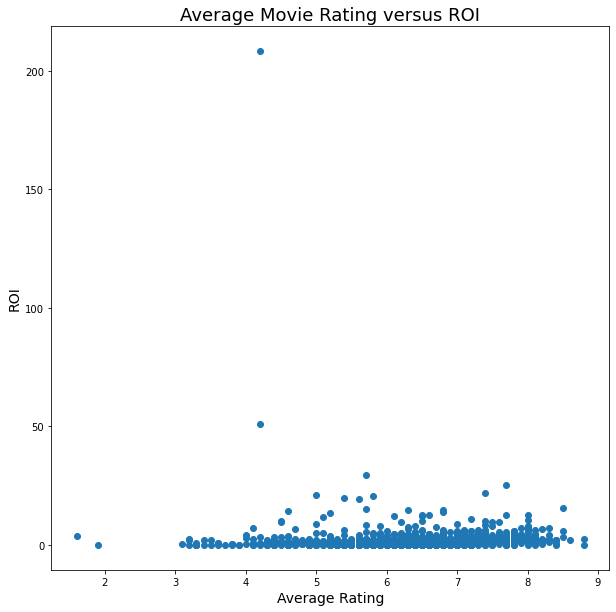

In [32]:
# Create a scatter plot of the averagerating versus the ROI

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
x_axis = cmb_rts_roi_df["averagerating"]
y_axis = cmb_rts_roi_df['ROI']
axes.scatter(x_axis, y_axis)
axes.set_title('Average Movie Rating versus ROI',fontsize=18)
plt.xlabel("Average Rating",fontsize=14)
plt.ylabel("ROI",fontsize=14)
plt.savefig('/Users/dhruvragunathan/Documents/Flatiron/phase_1/dsc-phase-1-project-v2-4/Movie_Rating_ROI.png')
plt.show()

In [33]:
r = np.corrcoef(cmb_rts_roi_df["averagerating"], cmb_rts_roi_df['ROI'])

r

array([[ 1.        , -0.00598582],
       [-0.00598582,  1.        ]])

In [34]:
cmb_rts_roi_df['ROI'].describe()

count    1433.000000
mean        1.953341
std         6.131967
min         0.000013
25%         0.505087
50%         1.149742
75%         2.061715
max       208.282370
Name: ROI, dtype: float64

There doesn't appear to be a correlation between ROI and ratings. However, there appear to be outliers in the ROI data that are skewing the data to the right. The data is also spread out since the standard deviation (6.1) is significantly greater than the mean (1.95). Let's perform the same analysis but for ROI values under 10 representing the data under 1.5 standard deviations.

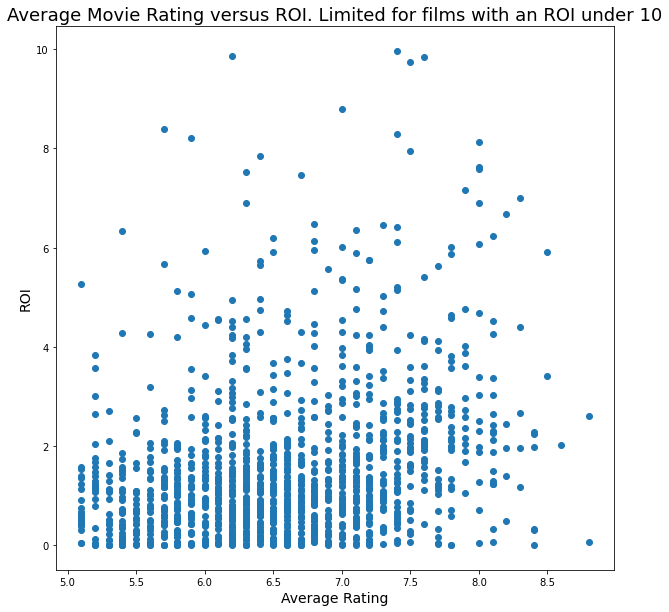

In [35]:
lmt_rts_roi_df = cmb_rts_roi_df[cmb_rts_roi_df['ROI']<10]
lmt_rts_roi_df = lmt_rts_roi_df[lmt_rts_roi_df["averagerating"]>5]

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
x_axis = lmt_rts_roi_df["averagerating"]
y_axis = lmt_rts_roi_df['ROI']
axes.scatter(x_axis, y_axis)
axes.set_title('Average Movie Rating versus ROI. Limited for films with an ROI under 10',fontsize=18)
plt.xlabel("Average Rating",fontsize=14)
plt.ylabel("ROI",fontsize=14)
plt.savefig('/Users/dhruvragunathan/Documents/Flatiron/dsc-phase-1-project-v2-4/Movie_Rating_ROI_lmt.png')
plt.show()

In [36]:
r = np.corrcoef(lmt_rts_roi_df["averagerating"], lmt_rts_roi_df['ROI'])

r

array([[1.        , 0.28222411],
       [0.28222411, 1.        ]])

The correlation coefficient implies that there is a moderate correlation between average rating and ROI. I would advise studio executives to not invest heavily in pleasing the critics to increase ROI.

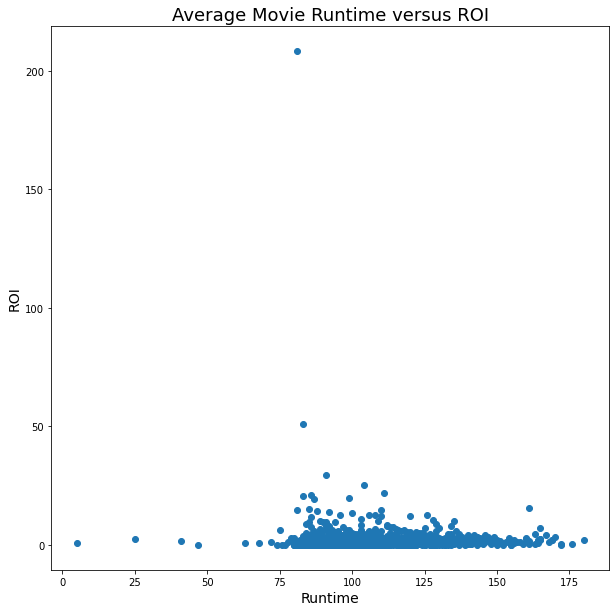

In [37]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
x_axis = cmb_rts_roi_df["runtime_minutes"]
y_axis = cmb_rts_roi_df['ROI']
axes.scatter(x_axis, y_axis)
axes.set_title('Average Movie Runtime versus ROI',fontsize=18)
plt.xlabel("Runtime",fontsize=14)
plt.ylabel("ROI",fontsize=14)
plt.savefig('/Users/dhruvragunathan/Documents/Flatiron/phase_1/dsc-phase-1-project-v2-4/Movie_Runtime_ROI.png')
plt.show()

In [38]:


r = np.corrcoef(cmb_rts_roi_df["runtime_minutes"], cmb_rts_roi_df['ROI'])

r

array([[ 1.        , -0.04956496],
       [-0.04956496,  1.        ]])

There doesn't seem to be a correlation between average movie runtime and ROI. Runtime likely does not have an impact on the ROI. But let's see if there is a trend if we remove the outliers

In [39]:
lmt_rts_roi_df = cmb_rts_roi_df[cmb_rts_roi_df['ROI']<10] # Create dataframe onl
lmt_rts_roi_df = lmt_rts_roi_df[(lmt_rts_roi_df["runtime_minutes"]>60) | (lmt_rts_roi_df["runtime_minutes"]<220)]

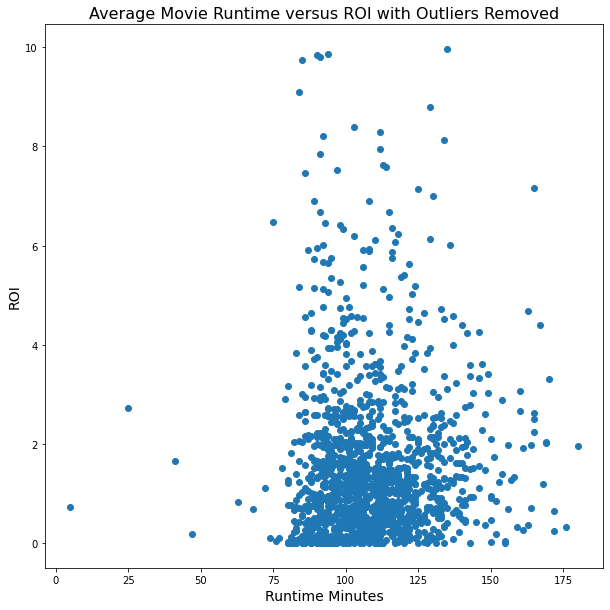

In [40]:


fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
x_axis = lmt_rts_roi_df["runtime_minutes"]
y_axis = lmt_rts_roi_df['ROI']
axes.scatter(x_axis, y_axis)
plt.xlabel("Runtime Minutes",fontsize=14)
plt.ylabel("ROI",fontsize=14)
axes.set_title('Average Movie Runtime versus ROI with Outliers Removed', fontsize=16)
plt.savefig('/Users/dhruvragunathan/Documents/Flatiron/phase_1/dsc-phase-1-project-v2-4/Movie_Runtime_ROI_lmt.png')
plt.show()

In [41]:
r = np.corrcoef(lmt_rts_roi_df["runtime_minutes"], lmt_rts_roi_df['ROI'])

r

array([[1.        , 0.04600045],
       [0.04600045, 1.        ]])

There does not seem to be a correlation between runtime and ROI. Microsoft does not need to create longer movies which are generally more expensive to maximize ROI.

# What Genres Gross the Most Money?

* Now that we've investigate the correlation between quantitative variables such as movie runtime and ratings, let's examine the effect of qualitative variables such as genres
* First let's prepare the data in the "genres" column for analysis.
* We need to break each genre into separate rows.
* To do this, we will use the "explode" function which can create unique rows for data in lists.
* Duplicate rows will need to be removed.

In [42]:
# Remove numerical columns that won't be grouped

cols_to_remove = ['runtime_minutes', 'start_year', 'numvotes', 'averagerating','id'] # Need to remove duplicate columns for explode to work

cols = [col for col in cmb_rts_roi_df.columns if col not in cols_to_remove]

group_subset = cmb_rts_roi_df[cols]

group_subset['genres_array'] = group_subset['genres'].map(lambda x: x.split(","))

<ipython-input-42-5342ade6f5ba>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_subset['genres_array'] = group_subset['genres'].map(lambda x: x.split(","))


In [43]:
group_subset = group_subset.loc[:,~group_subset.columns.duplicated()].copy() # Drop non-unique columns for explode

In [44]:
group_subset = group_subset.explode('genres_array')

group_subset

,movie_id,primary_title,original_title,genres,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI,release_year,genres_array
key,,,,,,,,,,,,
foodfight!_2012,tt0249516,Foodfight!,Foodfight!,"Action,Animation,Comedy","Dec 31, 2012",Foodfight!,45000000.0,0.0,73706.0,0.000819,2012,Action
foodfight!_2012,tt0249516,Foodfight!,Foodfight!,"Action,Animation,Comedy","Dec 31, 2012",Foodfight!,45000000.0,0.0,73706.0,0.000819,2012,Animation
foodfight!_2012,tt0249516,Foodfight!,Foodfight!,"Action,Animation,Comedy","Dec 31, 2012",Foodfight!,45000000.0,0.0,73706.0,0.000819,2012,Comedy
the secret life of walter mitty_2013,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,"Adventure,Comedy,Drama","Dec 25, 2013",The Secret Life of Walter Mitty,91000000.0,58236838.0,187861183.0,1.032204,2013,Adventure
the secret life of walter mitty_2013,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,"Adventure,Comedy,Drama","Dec 25, 2013",The Secret Life of Walter Mitty,91000000.0,58236838.0,187861183.0,1.032204,2013,Comedy
...,...,...,...,...,...,...,...,...,...,...,...,...
happy death day 2u_2019,tt8155288,Happy Death Day 2U,Happy Death Day 2U,"Drama,Horror,Mystery","Feb 13, 2019",Happy Death Day 2U,9000000.0,28051045.0,64179495.0,3.565527,2019,Horror
happy death day 2u_2019,tt8155288,Happy Death Day 2U,Happy Death Day 2U,"Drama,Horror,Mystery","Feb 13, 2019",Happy Death Day 2U,9000000.0,28051045.0,64179495.0,3.565527,2019,Mystery
fahrenheit 11/9_2018,tt8632862,Fahrenheit 11/9,Fahrenheit 11/9,Documentary,"Sep 21, 2018",Fahrenheit 11/9,5000000.0,6352306.0,6653715.0,0.665372,2018,Documentary


In [45]:
grouped_ROI = group_subset.groupby('genres_array').mean() # Aggregate the numerical columns by average. 

grouped_ROI

,production_budget,domestic_gross,worldwide_gross,ROI
genres_array,,,,
Action,8.278146e+07,9.113327e+07,2.506685e+08,1.374740
Adventure,1.081307e+08,1.260898e+08,3.554818e+08,1.562647
Animation,9.944118e+07,1.390442e+08,3.817493e+08,1.877699
Biography,2.620654e+07,4.036178e+07,8.230052e+07,1.748543
Comedy,4.258570e+07,6.186986e+07,1.405907e+08,1.625838
Crime,3.358982e+07,3.828411e+07,8.501505e+07,1.132420
Documentary,9.257086e+06,1.357067e+07,2.849019e+07,1.573334
Drama,2.795670e+07,3.529003e+07,7.730134e+07,1.664359
Family,6.962389e+07,8.270194e+07,2.030140e+08,1.362365


With our grouped dataframe, we can determine which genres have the highest average ROI.

In [46]:
grouped_ROI.index

Index(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
       'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller',
       'War', 'Western', 'missing'],
      dtype='object', name='genres_array')

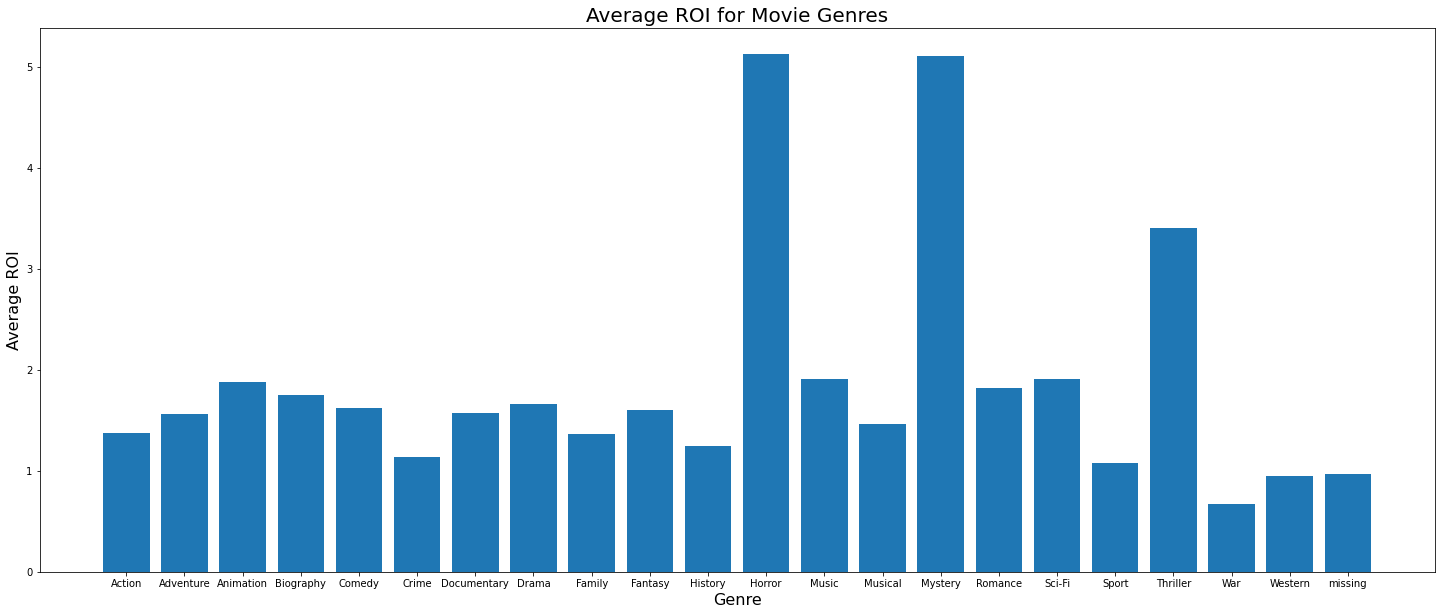

In [47]:
# Now we are going to aggregate the following columns to see if genre correlates with total revenue

#grouped.plot(kind='barh',figsize=(20, 15))
#plt.show()


fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(25,10))
x_axis = grouped_ROI.index
y_axis = grouped_ROI['ROI']
axes.bar(x_axis, y_axis)
axes.set_title('Average ROI for Movie Genres',fontsize=20)
plt.xlabel("Genre",fontsize=16)
plt.ylabel("Average ROI",fontsize=16)
plt.savefig('/Users/dhruvragunathan/Documents/Flatiron/phase_1/dsc-phase-1-project-v2-4/Movie_Genre_ROI.png')
plt.show()


Looks like horror movies have the highest ROI. Followed by mystery then thriller.

# What Roles are most correlated with ROI?

Let's investigate which roles are most correlated with ROI? This will help Microsoft focus on where to hire.

First let's prepare the data in the "primary profession" column for analysis.
We need to break each primary profession into separate rows.
To do this, we will use the "explode" function which can create unique rows for data in lists.
Duplicate rows will need to be removed.

In [48]:
# Pull the name and movies the cast have worked on in the persons/movie tables

q = """SELECT p.primary_name,p.primary_profession,mb.primary_title,mb.original_title
FROM known_for kf
INNER JOIN persons p
ON kf.person_id = p.person_id
INNER JOIN movie_basics mb
ON kf.movie_id = mb.movie_id
"""

person_movie_df = pd.read_sql(q,conn) 


In [49]:
# Dataframe has nearly 800 thousand rows
person_movie_df.describe

<bound method NDFrame.describe of              primary_name                                primary_profession  \
0       Mary Ellen Bauder         miscellaneous,production_manager,producer   
1       Mary Ellen Bauder         miscellaneous,production_manager,producer   
2            Joseph Bauer        composer,music_department,sound_department   
3            Joseph Bauer        composer,music_department,sound_department   
4            Axel Baumann  camera_department,cinematographer,art_department   
...                   ...                                               ...   
791001  Fleurette Dicaire                                              None   
791002        Joo Yeon So                                           actress   
791003     Madeline Smith                                           actress   
791004     Madeline Smith                                           actress   
791005     Pegasus Envoyé                             director,actor,writer   

                 

In [50]:
# Join the persons table with the ROI table

cmb_prs_roi_df = pd.merge(person_movie_df,cmb_rts_roi_df, how="inner", on=["original_title","original_title"])

cmb_prs_roi_df


,primary_name,primary_profession,primary_title_x,original_title,movie_id,primary_title_y,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI,release_year
0,Mary Ellen Bauder,"miscellaneous,production_manager,producer",Hotel Transylvania,Hotel Transylvania,tt0837562,Hotel Transylvania,2012,91.0,"Animation,Comedy,Family",tt0837562,7.1,204571,96,"Sep 28, 2012",Hotel Transylvania,85000000.0,148313048.0,378505812.0,2.226505,2012
1,James T. Sale,"music_department,composer,actor",Hotel Transylvania,Hotel Transylvania,tt0837562,Hotel Transylvania,2012,91.0,"Animation,Comedy,Family",tt0837562,7.1,204571,96,"Sep 28, 2012",Hotel Transylvania,85000000.0,148313048.0,378505812.0,2.226505,2012
2,CeeLo Green,"soundtrack,actor,composer",Hotel Transylvania,Hotel Transylvania,tt0837562,Hotel Transylvania,2012,91.0,"Animation,Comedy,Family",tt0837562,7.1,204571,96,"Sep 28, 2012",Hotel Transylvania,85000000.0,148313048.0,378505812.0,2.226505,2012
3,Jon Lovitz,"actor,soundtrack,writer",Hotel Transylvania,Hotel Transylvania,tt0837562,Hotel Transylvania,2012,91.0,"Animation,Comedy,Family",tt0837562,7.1,204571,96,"Sep 28, 2012",Hotel Transylvania,85000000.0,148313048.0,378505812.0,2.226505,2012
4,Todd Durham,"writer,director,producer",Hotel Transylvania,Hotel Transylvania,tt0837562,Hotel Transylvania,2012,91.0,"Animation,Comedy,Family",tt0837562,7.1,204571,96,"Sep 28, 2012",Hotel Transylvania,85000000.0,148313048.0,378505812.0,2.226505,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45236,Chao Wang,composer,Redemption,Sha jie,tt3104228,Redemption,2013,110.0,"Family,Horror,Romance",tt3104228,4.6,25,97,"Jun 28, 2013",Redemption,23000000.0,36686.0,13593473.0,0.295510,2013
45237,Doudou Zhang,actress,Redemption,Sha jie,tt3104228,Redemption,2013,110.0,"Family,Horror,Romance",tt3104228,4.6,25,97,"Jun 28, 2013",Redemption,23000000.0,36686.0,13593473.0,0.295510,2013
45238,Qing Zhu,"art_department,director,writer",Redemption,Sha jie,tt3104228,Redemption,2013,110.0,"Family,Horror,Romance",tt3104228,4.6,25,97,"Jun 28, 2013",Redemption,23000000.0,36686.0,13593473.0,0.295510,2013
45239,Vijay Chandar,"director,writer,soundtrack",Vaalu,Vaalu,tt3566698,Vaalu,2015,155.0,"Comedy,Romance",tt3566698,4.9,701,14,"Dec 31, 2015",Vaalu,1900000.0,0.0,12444.0,0.003275,2015


In [51]:
# Determine the missing values`

cmb_prs_roi_df.isna().sum()

primary_name            0
primary_profession    219
primary_title_x         0
original_title          0
movie_id                0
primary_title_y         0
start_year              0
runtime_minutes         0
genres                  0
movie_id                0
averagerating           0
numvotes                0
id                      0
release_date            0
movie                   0
production_budget       0
domestic_gross          0
worldwide_gross         0
ROI                     0
release_year            0
dtype: int64

In [52]:
# Drop rows since they are a small percentage of the total amount of rows

cmb_prs_roi_df.dropna(inplace=True)

cmb_prs_roi_df


,primary_name,primary_profession,primary_title_x,original_title,movie_id,primary_title_y,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI,release_year
0,Mary Ellen Bauder,"miscellaneous,production_manager,producer",Hotel Transylvania,Hotel Transylvania,tt0837562,Hotel Transylvania,2012,91.0,"Animation,Comedy,Family",tt0837562,7.1,204571,96,"Sep 28, 2012",Hotel Transylvania,85000000.0,148313048.0,378505812.0,2.226505,2012
1,James T. Sale,"music_department,composer,actor",Hotel Transylvania,Hotel Transylvania,tt0837562,Hotel Transylvania,2012,91.0,"Animation,Comedy,Family",tt0837562,7.1,204571,96,"Sep 28, 2012",Hotel Transylvania,85000000.0,148313048.0,378505812.0,2.226505,2012
2,CeeLo Green,"soundtrack,actor,composer",Hotel Transylvania,Hotel Transylvania,tt0837562,Hotel Transylvania,2012,91.0,"Animation,Comedy,Family",tt0837562,7.1,204571,96,"Sep 28, 2012",Hotel Transylvania,85000000.0,148313048.0,378505812.0,2.226505,2012
3,Jon Lovitz,"actor,soundtrack,writer",Hotel Transylvania,Hotel Transylvania,tt0837562,Hotel Transylvania,2012,91.0,"Animation,Comedy,Family",tt0837562,7.1,204571,96,"Sep 28, 2012",Hotel Transylvania,85000000.0,148313048.0,378505812.0,2.226505,2012
4,Todd Durham,"writer,director,producer",Hotel Transylvania,Hotel Transylvania,tt0837562,Hotel Transylvania,2012,91.0,"Animation,Comedy,Family",tt0837562,7.1,204571,96,"Sep 28, 2012",Hotel Transylvania,85000000.0,148313048.0,378505812.0,2.226505,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45236,Chao Wang,composer,Redemption,Sha jie,tt3104228,Redemption,2013,110.0,"Family,Horror,Romance",tt3104228,4.6,25,97,"Jun 28, 2013",Redemption,23000000.0,36686.0,13593473.0,0.295510,2013
45237,Doudou Zhang,actress,Redemption,Sha jie,tt3104228,Redemption,2013,110.0,"Family,Horror,Romance",tt3104228,4.6,25,97,"Jun 28, 2013",Redemption,23000000.0,36686.0,13593473.0,0.295510,2013
45238,Qing Zhu,"art_department,director,writer",Redemption,Sha jie,tt3104228,Redemption,2013,110.0,"Family,Horror,Romance",tt3104228,4.6,25,97,"Jun 28, 2013",Redemption,23000000.0,36686.0,13593473.0,0.295510,2013
45239,Vijay Chandar,"director,writer,soundtrack",Vaalu,Vaalu,tt3566698,Vaalu,2015,155.0,"Comedy,Romance",tt3566698,4.9,701,14,"Dec 31, 2015",Vaalu,1900000.0,0.0,12444.0,0.003275,2015


In [53]:
# Split out the primary profession
# drop duplicate columns like movie id

cols_to_remove = ['movie_id','id']
cols = [col for col in cmb_prs_roi_df.columns if col not in cols_to_remove]
cmb_prs_roi_df = cmb_prs_roi_df[cols]
cmb_prs_roi_df


,primary_name,primary_profession,primary_title_x,original_title,primary_title_y,start_year,runtime_minutes,genres,averagerating,numvotes,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI,release_year
0,Mary Ellen Bauder,"miscellaneous,production_manager,producer",Hotel Transylvania,Hotel Transylvania,Hotel Transylvania,2012,91.0,"Animation,Comedy,Family",7.1,204571,"Sep 28, 2012",Hotel Transylvania,85000000.0,148313048.0,378505812.0,2.226505,2012
1,James T. Sale,"music_department,composer,actor",Hotel Transylvania,Hotel Transylvania,Hotel Transylvania,2012,91.0,"Animation,Comedy,Family",7.1,204571,"Sep 28, 2012",Hotel Transylvania,85000000.0,148313048.0,378505812.0,2.226505,2012
2,CeeLo Green,"soundtrack,actor,composer",Hotel Transylvania,Hotel Transylvania,Hotel Transylvania,2012,91.0,"Animation,Comedy,Family",7.1,204571,"Sep 28, 2012",Hotel Transylvania,85000000.0,148313048.0,378505812.0,2.226505,2012
3,Jon Lovitz,"actor,soundtrack,writer",Hotel Transylvania,Hotel Transylvania,Hotel Transylvania,2012,91.0,"Animation,Comedy,Family",7.1,204571,"Sep 28, 2012",Hotel Transylvania,85000000.0,148313048.0,378505812.0,2.226505,2012
4,Todd Durham,"writer,director,producer",Hotel Transylvania,Hotel Transylvania,Hotel Transylvania,2012,91.0,"Animation,Comedy,Family",7.1,204571,"Sep 28, 2012",Hotel Transylvania,85000000.0,148313048.0,378505812.0,2.226505,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45236,Chao Wang,composer,Redemption,Sha jie,Redemption,2013,110.0,"Family,Horror,Romance",4.6,25,"Jun 28, 2013",Redemption,23000000.0,36686.0,13593473.0,0.295510,2013
45237,Doudou Zhang,actress,Redemption,Sha jie,Redemption,2013,110.0,"Family,Horror,Romance",4.6,25,"Jun 28, 2013",Redemption,23000000.0,36686.0,13593473.0,0.295510,2013
45238,Qing Zhu,"art_department,director,writer",Redemption,Sha jie,Redemption,2013,110.0,"Family,Horror,Romance",4.6,25,"Jun 28, 2013",Redemption,23000000.0,36686.0,13593473.0,0.295510,2013
45239,Vijay Chandar,"director,writer,soundtrack",Vaalu,Vaalu,Vaalu,2015,155.0,"Comedy,Romance",4.9,701,"Dec 31, 2015",Vaalu,1900000.0,0.0,12444.0,0.003275,2015


In [54]:
cmb_prs_roi_df['profession_split'] = cmb_prs_roi_df['primary_profession'].map(lambda x: x.split(","))
cmb_prs_roi_df=cmb_prs_roi_df.explode('profession_split')

<ipython-input-54-b52f90a2f1ab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cmb_prs_roi_df['profession_split'] = cmb_prs_roi_df['primary_profession'].map(lambda x: x.split(","))


In [55]:
# Group by primary name and primary profession

role_roi_df=cmb_prs_roi_df.groupby('profession_split').mean().sort_values(by='ROI',ascending=False)

role_roi_df

,start_year,runtime_minutes,averagerating,numvotes,production_budget,domestic_gross,worldwide_gross,ROI
profession_split,,,,,,,,
assistant,2016.400000,106.800000,6.360000,131296.800000,5.862000e+07,4.401881e+07,1.085198e+08,3.571597
casting_director,2014.124161,116.382550,6.639597,182580.687919,5.726690e+07,9.213256e+07,2.327058e+08,3.086346
manager,2013.886667,110.086667,6.404000,154426.186667,4.423584e+07,5.461675e+07,1.397881e+08,2.935022
publicist,2013.888889,114.000000,6.244444,95342.111111,4.300000e+07,7.205421e+07,1.975791e+08,2.774274
set_decorator,2014.227273,113.828671,6.490210,166846.003497,6.761003e+07,7.217770e+07,2.018328e+08,2.755679
editorial_department,2014.044105,113.471162,6.633588,201655.015691,7.033353e+07,9.240502e+07,2.429433e+08,2.300989
actress,2014.078540,113.615923,6.573272,171197.367641,5.975147e+07,8.424038e+07,2.116445e+08,2.269805
production_designer,2014.175841,115.188838,6.624847,190878.118502,6.972477e+07,8.710924e+07,2.323127e+08,2.219066
legal,2013.939394,108.121212,6.645455,99382.909091,2.203485e+07,3.087327e+07,6.246598e+07,2.190737


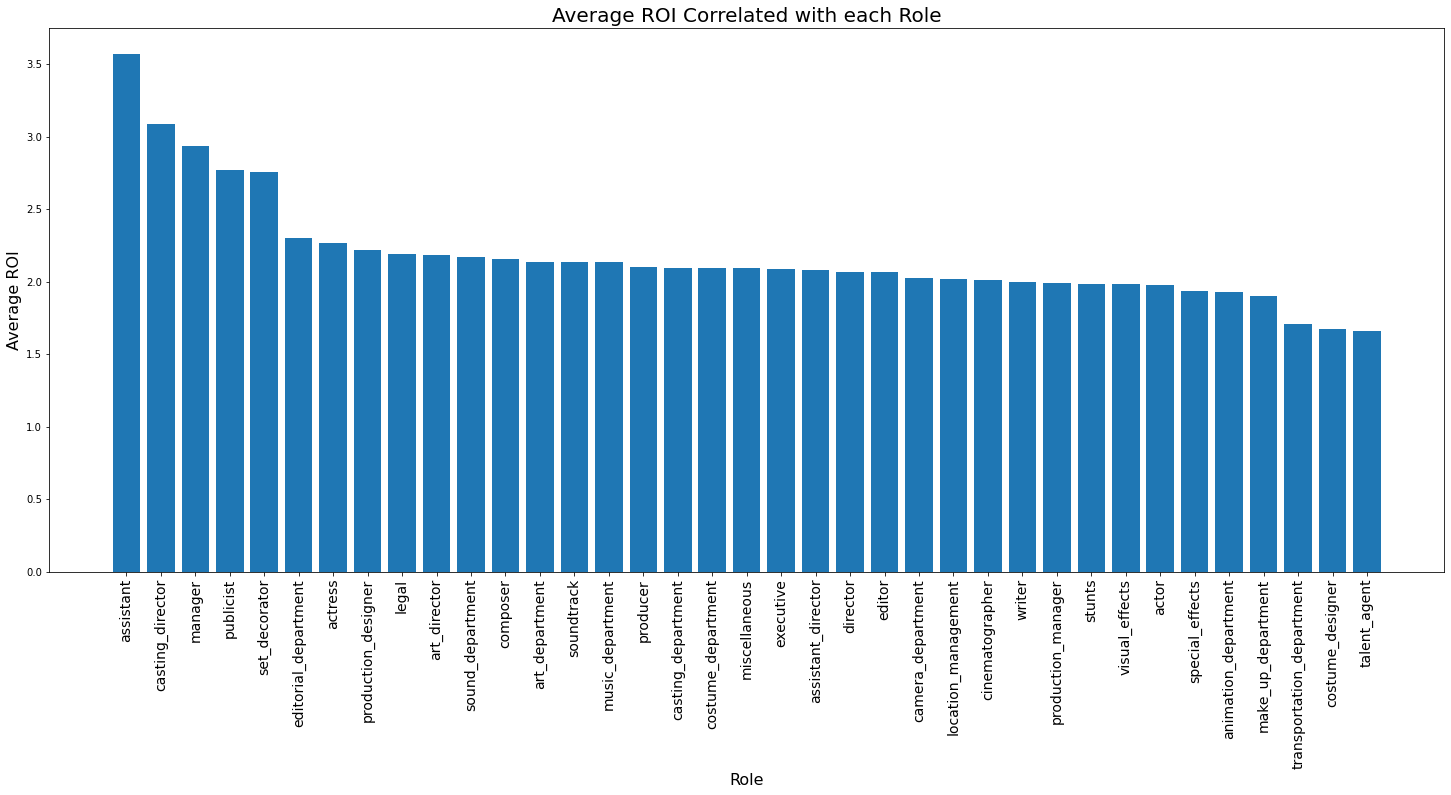

In [56]:
# Now that we've aggregated the average ROI correlated with each cast role, let's visualize it.

#grouped.plot(kind='barh',figsize=(20, 15))
#plt.show()


fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(25,10))
x_axis = role_roi_df.index
y_axis = role_roi_df['ROI']
axes.bar(x_axis, y_axis)
axes.set_title('Average ROI Correlated with each Role',fontsize=20)
plt.xlabel("Role",fontsize=16)
plt.ylabel("Average ROI",fontsize=16)
plt.xticks(rotation=90,fontsize=14)
plt.savefig('/Users/dhruvragunathan/Documents/Flatiron/phase_1/dsc-phase-1-project-v2-4/Movie_Role_ROI.png',pad_inches=0.1)
plt.show()

Microsoft should hire the best assistant, casting directors, and manager since their roles seem to correlate the most with ROI.